In [1]:
import pandas as pd
import sqlite3
import pygwalker as pyg
import matplotlib.pyplot as plt

In [2]:
mediciones = pd.read_csv("Data/DS_Mediciones_Clima.csv", sep=";")

In [5]:
conn = sqlite3.connect("Base/BD_Mediciones_suelo.sqlite")

In [6]:
cursor = conn.cursor()

In [7]:
suelo = pd.read_sql("SELECT * FROM Mediciones_suelo", con=conn)

In [8]:
mediciones

id   region      fecha   hora  es_dia  temperatura_2m  lluvia_mm  \
0          1   sierra   1/1/2020   0:00       0            10.4        9.2   
1          2    costa   1/1/2020   0:00       0            27.2        0.2   
2          3  oriente   1/1/2020   0:00       0            20.5        5.5   
3          4   sierra   1/1/2020  12:00       1            12.5        3.3   
4          5    costa   1/1/2020  12:00       1            24.0        0.8   
...      ...      ...        ...    ...     ...             ...        ...   
11789  11790  oriente  18/5/2025  12:00       1            22.8        1.4   
11790  11791    costa  19/5/2025   0:00       0            26.9        0.1   
11791  11792  oriente  19/5/2025   0:00       0            19.6        1.7   
11792  11793    costa  19/5/2025  12:00       1            23.2        0.0   
11793  11794  oriente  19/5/2025  12:00       1            21.8        3.5   

       humedad_relativa_2m  temperatura_aparente  radiacion_directa  \
0                       95                  10.0                2.5   
1                       75                  30.9              147.5   
2                       99                  24.1                1.2   
3                      100                  12.4               54.0   
4                       94                  28.9                0.7   
...                    ...                   ...                ...   
11789                   89                  26.8               41.7   
11790                   83                  32.5              160.7   
11791                   98                  22.6                8.0   
11792                   99                  28.4                1.5   
11793                   96                  25.9               20.5   

       cod_clima  presion_msl  
0             61       1018.7  
1             51       1009.4  
2             53       1015.5  
3             53       1018.4  
4             51       1012.1  
...          ...          ...  
11789         51       1016.6  
11790         51       1010.4  
11791         51       1015.8  
11792          1       1011.6  
11793         53       1017.2  

[11794 rows x 12 columns]

In [9]:
suelo

id  velocidad_viento_10m  presion_superficie  temp_suelo_7cm  \
0          1                   2.3               714.1            11.4   
1          2                  10.5              1009.4            29.3   
2          3                   3.3               893.0            21.2   
3          4                   6.0               715.7            12.9   
4          5                   3.4              1012.1            25.7   
...      ...                   ...                 ...             ...   
11789  11790                   2.2               894.8            22.3   
11790  11791                   2.4              1010.4            28.8   
11791  11792                   2.8               892.9            21.0   
11792  11793                   2.2              1011.6            24.1   
11793  11794                   2.5               894.9            21.4   

       humedad_suelo_7cm  temp_suelo_250cm  
0                  0.439              11.1  
1                  0.410              26.8  
2                  0.427              22.2  
3                  0.431              11.1  
4                  0.456              26.8  
...                  ...               ...  
11789              0.405              22.0  
11790              0.418              27.2  
11791              0.416              22.0  
11792              0.423              27.2  
11793              0.430              22.0  

[11794 rows x 6 columns]

In [10]:
unificado = pd.merge(mediciones, suelo, on='id')

In [11]:
unificado

id   region      fecha   hora  es_dia  temperatura_2m  lluvia_mm  \
0          1   sierra   1/1/2020   0:00       0            10.4        9.2   
1          2    costa   1/1/2020   0:00       0            27.2        0.2   
2          3  oriente   1/1/2020   0:00       0            20.5        5.5   
3          4   sierra   1/1/2020  12:00       1            12.5        3.3   
4          5    costa   1/1/2020  12:00       1            24.0        0.8   
...      ...      ...        ...    ...     ...             ...        ...   
11789  11790  oriente  18/5/2025  12:00       1            22.8        1.4   
11790  11791    costa  19/5/2025   0:00       0            26.9        0.1   
11791  11792  oriente  19/5/2025   0:00       0            19.6        1.7   
11792  11793    costa  19/5/2025  12:00       1            23.2        0.0   
11793  11794  oriente  19/5/2025  12:00       1            21.8        3.5   

       humedad_relativa_2m  temperatura_aparente  radiacion_directa  \
0                       95                  10.0                2.5   
1                       75                  30.9              147.5   
2                       99                  24.1                1.2   
3                      100                  12.4               54.0   
4                       94                  28.9                0.7   
...                    ...                   ...                ...   
11789                   89                  26.8               41.7   
11790                   83                  32.5              160.7   
11791                   98                  22.6                8.0   
11792                   99                  28.4                1.5   
11793                   96                  25.9               20.5   

       cod_clima  presion_msl  velocidad_viento_10m  presion_superficie  \
0             61       1018.7                   2.3               714.1   
1             51       1009.4                  10.5              1009.4   
2             53       1015.5                   3.3               893.0   
3             53       1018.4                   6.0               715.7   
4             51       1012.1                   3.4              1012.1   
...          ...          ...                   ...                 ...   
11789         51       1016.6                   2.2               894.8   
11790         51       1010.4                   2.4              1010.4   
11791         51       1015.8                   2.8               892.9   
11792          1       1011.6                   2.2              1011.6   
11793         53       1017.2                   2.5               894.9   

       temp_suelo_7cm  humedad_suelo_7cm  temp_suelo_250cm  
0                11.4              0.439              11.1  
1                29.3              0.410              26.8  
2                21.2              0.427              22.2  
3                12.9              0.431              11.1  
4                25.7              0.456              26.8  
...               ...                ...               ...  
11789            22.3              0.405              22.0  
11790            28.8              0.418              27.2  
11791            21.0              0.416              22.0  
11792            24.1              0.423              27.2  
11793            21.4              0.430              22.0  

[11794 rows x 17 columns]

In [12]:
pyg.walk(unificado)

Box(children=(HTML(value='\n<div id="ifr-pyg-000635af2ff7f023UG3VvXeEMi9NmL6n" style="height: auto">\n    <hea…

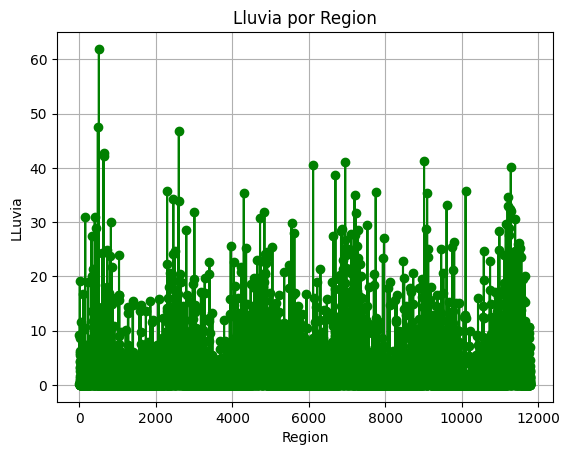

In [14]:
plt.plot(unificado['lluvia_mm'], marker='o', linestyle='-', color='green')
plt.title('Lluvia por Region')
plt.xlabel('Region')
plt.ylabel('LLuvia')
plt.grid(True)
plt.show()

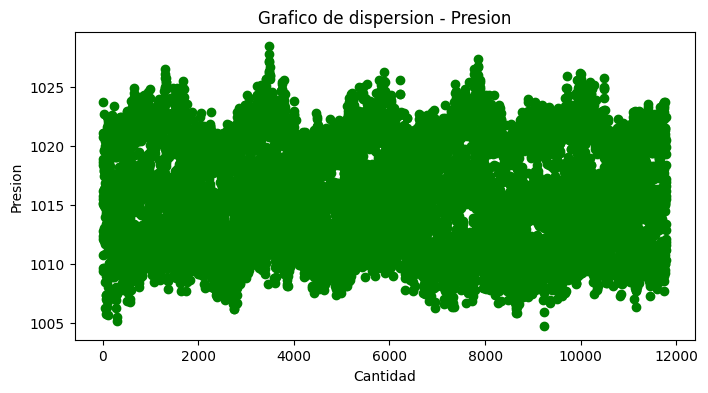

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(unificado.index, unificado['presion_msl'], color='green')
plt.title('Grafico de dispersion - Presion')
plt.xlabel('Cantidad')
plt.ylabel('Presion')
plt.show()

C:\Users\mcueva\AppData\Local\Temp\ipykernel_31668\2098612431.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  unificado.lluvia_mm.value_counts()[:20].sort_values(inplace=False).plot(kind='barh')


<Axes: ylabel='lluvia_mm'>

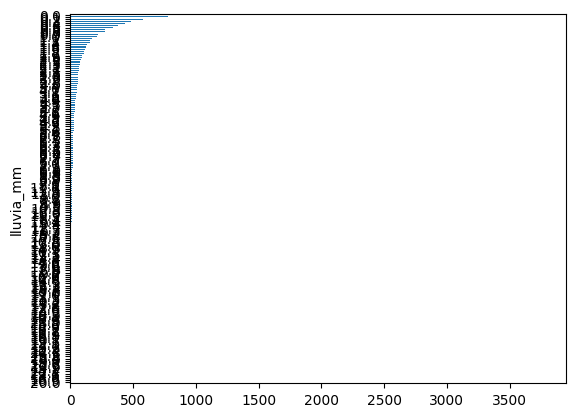

In [17]:
unificado.lluvia_mm.value_counts()[:20].sort_values(inplace=False).plot(kind='barh')

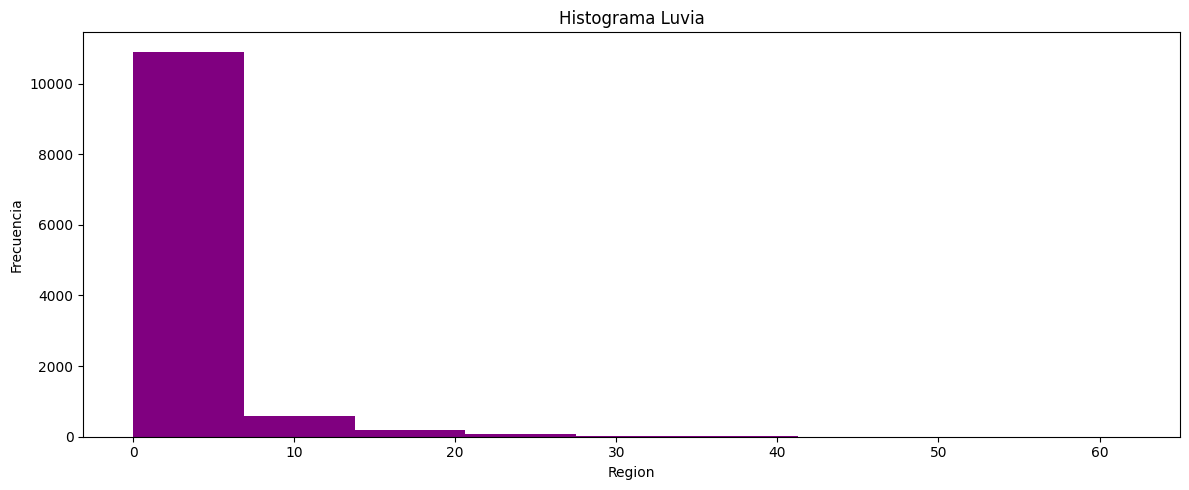

In [19]:
plt.figure(figsize=(12,5))
plt.hist(unificado['lluvia_mm'], bins=9, color='purple')
plt.title('Histograma Luvia')
plt.xlabel('Region')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [20]:
import matplotlib.pyplot as plt

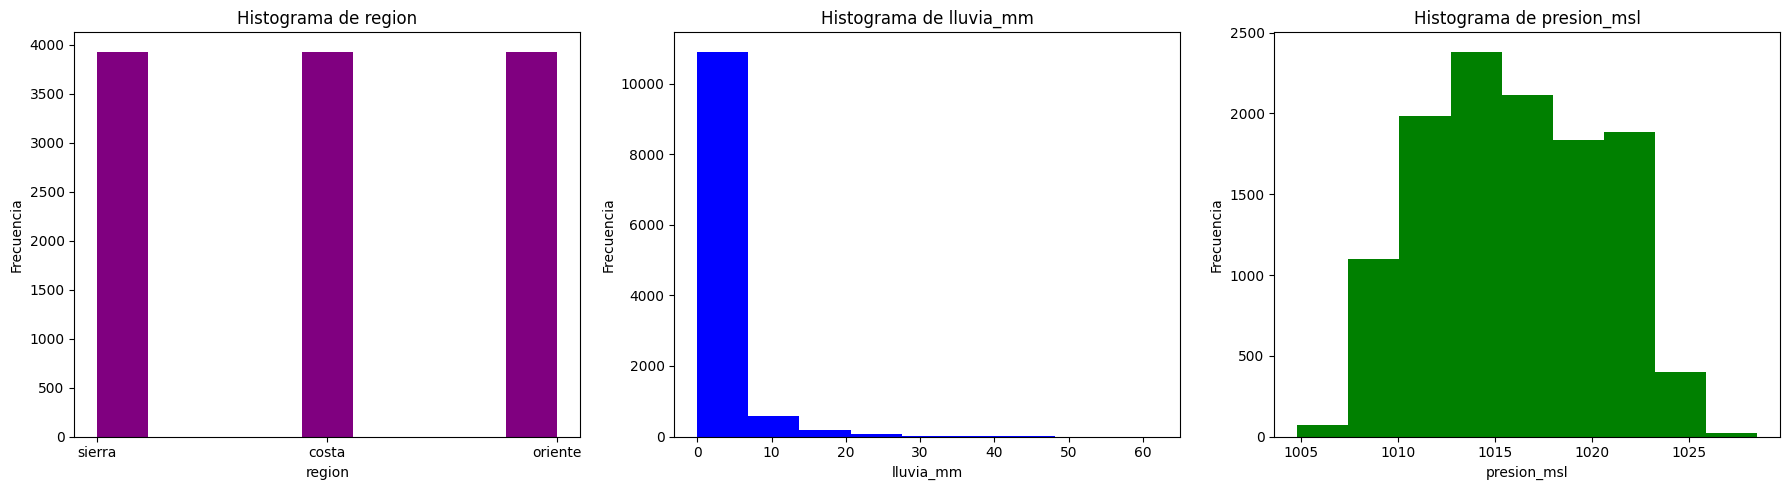

In [21]:
plt.figure(figsize=(18, 5))

columnas = ['region', 'lluvia_mm', 'presion_msl']

for i, columna in enumerate(columnas, 1):
    plt.subplot(1, len(columnas), i)
    plt.hist(unificado[columna], bins=9, color=['purple', 'blue', 'green'][i-1])
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

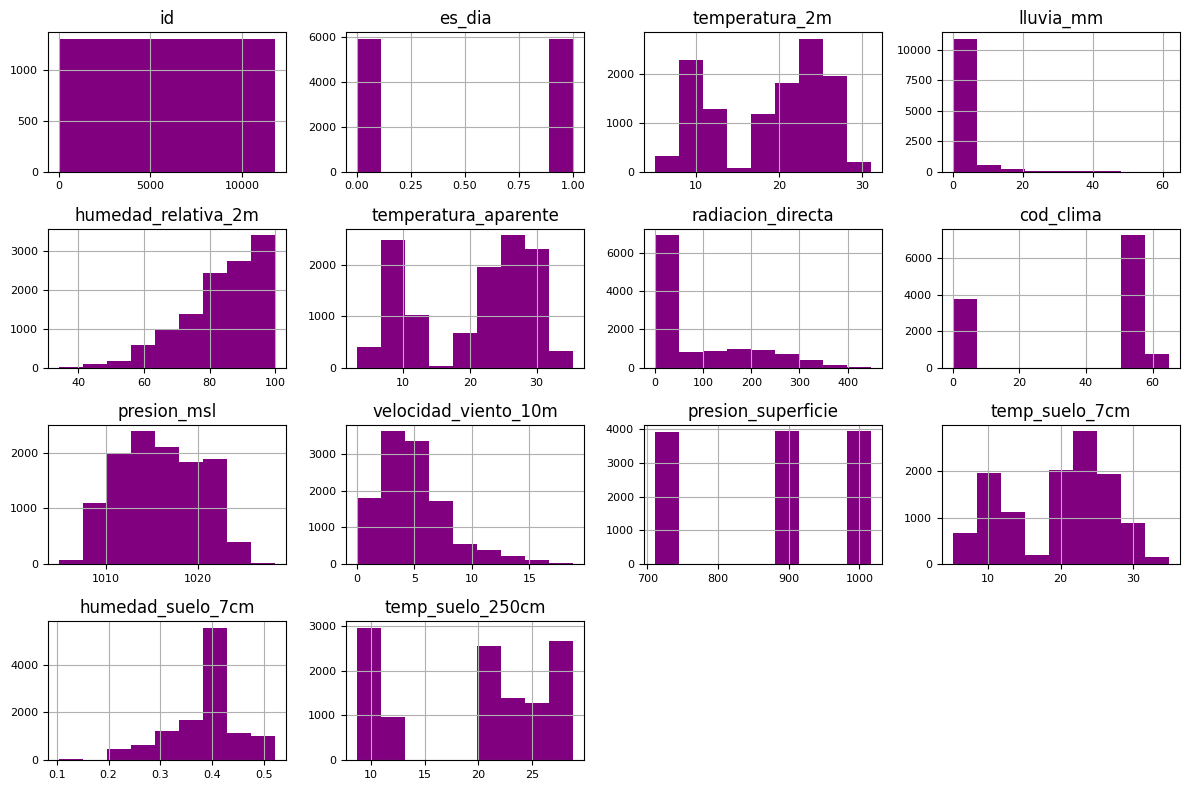

In [22]:
unificado.select_dtypes(include=['number']).hist(
    bins=9,
    figsize=(12, 8),
    color='purple',
    xlabelsize=8,
    ylabelsize=8
)
plt.tight_layout()
plt.show()

In [54]:
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10
from bokeh.plotting import figure, show, output_notebook

In [55]:
source = ColumnDataSource(unificado)
output_notebook() 

Loading BokehJS ...

In [59]:
p = figure(
    title="Gráfico Sencillo de Dos Parámetros",
    x_axis_label='Region',
    y_axis_label='lluvia_mm',
    width=600,
    height=400
)


In [62]:
p.scatter(x='region', y='lluvia_mm', source=unificado, size=100, color='blue', alpha=0.8)

GlyphRenderer(id='p1492', ...)

In [63]:
show(p)